In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt


# Show plots in the notebook
%matplotlib inline

In [2]:
df = pd.read_excel("Global_Carbon_Budget_2016_v1.0.xlsx",sheet_name = 'Global Carbon Budget')

In [3]:
df

,Year,fossil fuel and cement emissions,land-use change emissions,atmospheric growth,ocean sink,land sink
0,1959,2.454000,1.472776,2.0352,0.923444,0.968132
1,1960,2.569000,1.460635,1.5052,0.930760,1.593674
2,1961,2.580000,1.530231,1.6536,0.802893,1.653738
3,1962,2.686000,1.519804,1.1872,0.865545,2.153059
4,1963,2.833000,1.526285,1.2084,1.033248,2.117636
5,1964,2.995000,1.517334,1.0388,1.287387,2.186147
6,1965,3.130000,1.548472,2.3320,1.511583,0.834889
7,1966,3.288000,1.550826,2.3320,1.495371,1.011455
8,1967,3.393000,1.594899,1.2932,1.248098,2.446601
9,1968,3.566000,1.546056,2.0988,1.231760,1.781497


In [4]:
df1 = df.iloc[27:45]

In [5]:
df1

,Year,fossil fuel and cement emissions,land-use change emissions,atmospheric growth,ocean sink,land sink
27,1986,5.583000,1.529187,2.1836,2.039081,2.889506
28,1987,5.725000,1.514771,5.7028,2.020493,-0.483522
29,1988,5.936000,1.514177,4.7700,1.874299,0.805878
30,1989,6.066000,1.531202,2.9256,1.968069,2.703533
31,1990,6.086243,1.444222,2.5016,2.033839,2.995026
32,1991,6.165851,1.635869,1.5476,2.130077,4.124044
33,1992,6.115328,1.682038,1.4840,2.375833,3.937533
34,1993,6.124183,1.545791,2.5864,2.417003,2.666571
35,1994,6.225964,1.502806,3.5616,2.209018,1.958152
36,1995,6.323256,1.485181,4.1340,2.108607,1.565830


In [6]:
gamma = df1['fossil fuel and cement emissions']

In [7]:
gamma

27    5.583000
28    5.725000
29    5.936000
30    6.066000
31    6.086243
32    6.165851
33    6.115328
34    6.124183
35    6.225964
36    6.323256
37    6.475109
38    6.568864
39    6.592948
40    6.623553
41    6.785099
42    6.974111
43    7.073644
44    7.473479
Name: fossil fuel and cement emissions, dtype: float64

In [8]:
k12 = 105 / 740
k21 = 102 / 900
N1_1986 = 740
N2_1986 = 900
dt = 1  
start_year = 1987
end_year = 2004
num_years = end_year - start_year + 1

In [9]:
atmospheric_CO2_concentration = []

In [10]:
N1 = N1_1986
N2 = N2_1986
for i in range(num_years):
    dN1 = -k12 * N1 + k21 * N2 + gamma[i+27]*3.664
    dN2 = k12 * N1 - k21 * N2
    N1 += dN1 * dt
    N2 += dN2 * dt
    atmospheric_CO2_concentration.append(N1/2.13)

In [11]:
atmospheric_CO2_concentration 

[355.61319812206574,
 363.04959213297803,
 370.06710561197355,
 376.67444764998584,
 382.8128450167472,
 388.7080513876684,
 394.21380449744555,
 399.5217934005249,
 404.84407054824135,
 410.1891095167543,
 415.66392275146,
 421.16505412473254,
 426.58421820434864,
 431.95824562138733,
 437.5298686417059,
 443.3273947906882,
 449.1760970067673,
 455.59889411209326]

In [12]:
atmospheric_CO2_concentration2 = []

In [13]:
n20 = 821
n1 = N1_1986
n2 = N2_1986

In [14]:
for i in range(num_years):
    x = (n1 / 2.13 - 290.21) * 0.002057 / (290.21 * (n2 / 2.13 / 44010 - 0.002057))
    dn1 = -k12 * n1 + k21 * (n20 + x * (n2 - n20)) + gamma[i+27]*3.664
    dn2 = k12 * n1 - k21 * (n20 + x * (n2 - n20))
    n1 += dn1 * dt
    n2 += dn2 * dt
    atmospheric_CO2_concentration2.append(n1 / 2.13)

In [15]:
atmospheric_CO2_concentration2

[351.63569217047984,
 355.5467833744734,
 359.3182039446759,
 362.83555503888715,
 365.95012903483416,
 368.8235102091883,
 371.268394147835,
 373.4477928292415,
 375.55943843264373,
 377.6064300832884,
 379.69275741564053,
 381.71466747573555,
 383.5621065398342,
 385.27021640124804,
 387.0831278636079,
 389.03497903532235,
 390.95451729641655,
 393.3632402800778]

In [16]:
df2=df1.assign(
    CO2=atmospheric_CO2_concentration,
    CO2_x=atmospheric_CO2_concentration2
)

In [17]:
ob_CO2 = pd.read_csv('co2_annmean_mlo.csv')

In [18]:
ob_CO2

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


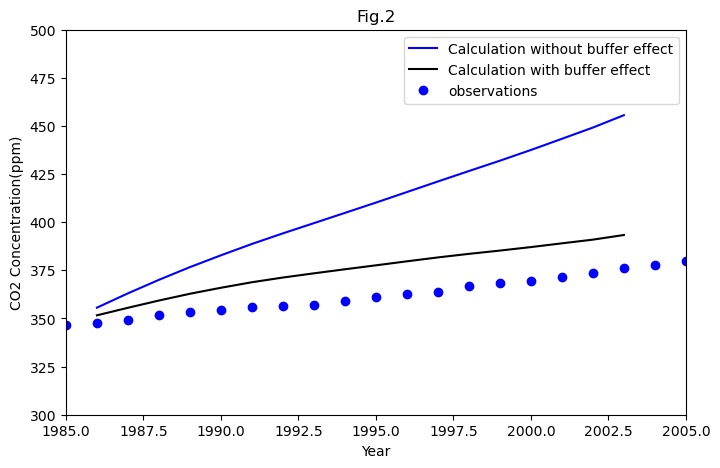

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(df2['Year'],df2['CO2'], 'b-', label='Calculation without buffer effect') 
plt.plot(df2['Year'],df2['CO2_x'], 'k-', label='Calculation with buffer effect') 
plt.plot(ob_CO2['year'],ob_CO2['mean'],'bo',label='observations')
plt.title('Fig.2')  
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xlim(1985,2005)
plt.ylim(300, 500)
plt.legend()


In [38]:
k12 = 60/615
k21 = 60/842
k23 = 9/842
k24 = 43/842
k32 = 52/9744
k34 = 162/9744
k43 = 205/26280
k45 = 0.2/26280
k51 = 0.2/90000000
k67 = 62/731
k71 = 62/1328
N1_1959 = 740
N2_1959 = 842
N3_1959 = 9744
N4_1959 = 26280
N5_1959 = 90000000
N6_1959 = 731
N7_1959 = 1238
dt = 1  
Start_year = 1960
End_year = 2015
Num_years = End_year - Start_year + 1
N2_0 = 289 * 2.13

In [39]:
co2_c1 = []

In [40]:
N01 = N1_1959
N02 = N2_1959
N03 = N3_1959
N04 = N4_1959
N05 = N5_1959
N06 = N6_1959
N07 = N7_1959
GAMMA = df['fossil fuel and cement emissions']
DELTA = df['land-use change emissions']

In [41]:
for i in range(Num_years):
    X = (N01 / 2.13 - 290.21) * 0.002057 / (290.21 * (N02 / 2.13 / 44010 - 0.002057))
    F = 62 * (1 + 0.38 * math.log(N01/2.13/290.21))
    dn1= -k12 * N01 + k21 * (N2_0 + X * (N02 - N2_0)) + GAMMA[i] * 3.664 - F + DELTA[i] * 3.664 + k51 * N05 + k71*N07
    dn2=k12*N01-k21*(N2_0+X*(N02-N2_0))-k23*N02+k32*N03-k24*N02
    dn3=k23*N02-k32*N03-k34*N03+k43*N04
    dn4=k34*N03-k43*N04+k24*N02-k45*N04
    dn5=k45*N04-k51*N05
    dn6=F-k67*N06-2*df['land-use change emissions'][i]*3.664
    dn7=k67*N06-k71*N07
    N01 += dn1 * dt
    N02 += dn2 * dt
    N03 += dn3 * dt
    N04 += dn4 * dt
    N05 += dn5 * dt
    N06 += dn6 * dt
    N07 += dn7 * dt
    co2_c1.append(N01 / 2.13)

In [42]:
co2_c1

[337.4466597896072,
 328.98978495793983,
 321.8006913448355,
 315.7303759814952,
 310.72297716626474,
 306.63074407381157,
 303.34843889472876,
 300.7525369599749,
 298.72595573377,
 297.1437499410201,
 296.0887711544053,
 295.573435658111,
 295.1228738947267,
 294.8268645251157,
 294.90316961840387,
 294.876367920331,
 294.76538625376895,
 295.0948601117759,
 295.6357685011963,
 296.0542647241323,
 296.7620648370323,
 297.2076852609789,
 297.26997384092454,
 297.19692021809124,
 297.34138849409123,
 297.77356313603735,
 298.4337973075708,
 299.29139581240287,
 300.2030610378428,
 301.3039454826831,
 302.46185002495434,
 303.3025593768138,
 304.4468495412383,
 305.385652622182,
 305.93201189806484,
 306.4534009224134,
 306.9904034952866,
 307.64031762632607,
 309.54534552329125,
 310.10649939498086,
 310.1860898089381,
 310.30410402767615,
 310.2730552524352,
 310.5629883220671,
 311.182494151556,
 312.5944181502543,
 314.44943772545696,
 316.68945601108555,
 318.867219372526,
 320.595

In [43]:
co2_c2 = []

In [44]:
for i in range(Num_years):
    X = (N01 / 2.13 - 290.21) * 0.002057 / (290.21 * (N02 / 2.13 / 44010 - 0.002057))
    F = 62 * (1 + 0.5 * math.log(N01/2.13/290.21))
    dn1= -k12 * N01 + k21 * (N2_0 + X * (N02 - N2_0)) + GAMMA[i] * 3.664 - F + DELTA[i] * 3.664 + k51 * N05 + k71*N07
    dn2=k12*N01-k21*(N2_0+X*(N02-N2_0))-k23*N02+k32*N03-k24*N02
    dn3=k23*N02-k32*N03-k34*N03+k43*N04
    dn4=k34*N03-k43*N04+k24*N02-k45*N04
    dn5=k45*N04-k51*N05
    dn6=F-k67*N06-2*df['land-use change emissions'][i]*3.664
    dn7=k67*N06-k71*N07
    N01 += dn1 * dt
    N02 += dn2 * dt
    N03 += dn3 * dt
    N04 += dn4 * dt
    N05 += dn5 * dt
    N06 += dn6 * dt
    N07 += dn7 * dt
    co2_c2.append(N01 / 2.13)

In [45]:
co2_c2

[324.25676198603435,
 315.5213408420999,
 308.0968599181749,
 301.84246720427814,
 296.7042195382831,
 292.5315524709867,
 289.21439478251415,
 286.62317195634677,
 284.6346451781188,
 283.11814644173717,
 282.15173909816394,
 281.7416430097513,
 281.4066020671078,
 281.23621312280625,
 281.446555361498,
 281.5575920731031,
 281.5900787165795,
 282.0698131381233,
 282.76174836965174,
 283.32961352400156,
 284.18728316793255,
 284.77965519432934,
 284.9896039467713,
 285.07015466960075,
 285.37521940678033,
 285.9711514255398,
 286.79397523838503,
 287.80999077450366,
 288.87369150227653,
 290.12020795696066,
 291.4155606091924,
 292.38574425558556,
 293.6565980150617,
 294.7153717179763,
 295.37852197133265,
 296.01887410442515,
 296.6768917027398,
 297.44922370229375,
 299.4762450536704,
 300.14282701258867,
 300.33042393372875,
 300.56462344147246,
 300.65617422846026,
 301.0759240289853,
 301.82718015466344,
 303.3680852153095,
 305.339463122608,
 307.6791849632748,
 309.93736850004

In [46]:
df3=df.assign(
    co2_1=co2_c1,
    co2_2=co2_c2
)

ValueError: Length of values (56) does not match length of index (57)

In [47]:
df3

,Year,fossil fuel and cement emissions,land-use change emissions,atmospheric growth,ocean sink,land sink,co2_1,co2_2
0,1959,2.454000,1.472776,2.0352,0.923444,0.968132,337.446660,326.696956
1,1960,2.569000,1.460635,1.5052,0.930760,1.593674,328.989785,317.680440
2,1961,2.580000,1.530231,1.6536,0.802893,1.653738,321.800691,310.006626
3,1962,2.686000,1.519804,1.1872,0.865545,2.153059,315.730376,303.531927
4,1963,2.833000,1.526285,1.2084,1.033248,2.117636,310.722977,298.199750
5,1964,2.995000,1.517334,1.0388,1.287387,2.186147,306.630744,293.857011
6,1965,3.130000,1.548472,2.3320,1.511583,0.834889,303.348439,290.391227
7,1966,3.288000,1.550826,2.3320,1.495371,1.011455,300.752537,287.670551
8,1967,3.393000,1.594899,1.2932,1.248098,2.446601,298.725956,285.569614
9,1968,3.566000,1.546056,2.0988,1.231760,1.781497,297.143750,283.955771


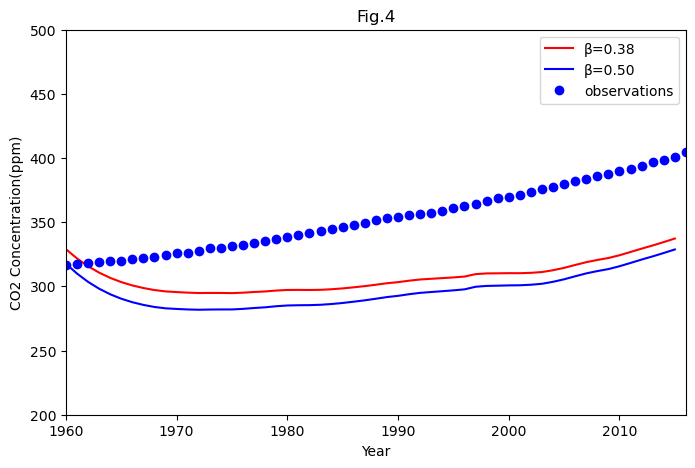

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(df3['Year'],df3['co2_1'], 'r-', label='β=0.38') 
plt.plot(df3['Year'],df3['co2_2'], 'b-', label='β=0.50') 
plt.plot(ob_CO2['year'],ob_CO2['mean'],'bo',label='observations')
plt.title('Fig.4')  
plt.xlabel('Year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xlim(1960,2016)
plt.ylim(200, 500)
plt.legend()
